In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:

raw_dataset = pd.read_csv('boston summary.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.head(10)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
0,3/1/2005,180.147647,5.93,52698,4473.477,4.7,287529.502,1317.6788,41.00%,226272.0000,0.50%,1479,0.02,197.4
1,4/1/2005,180.012971,5.86,52698,4473.477,4.4,287529.502,1317.6788,41.00%,227099.6667,0.47%,1235,0.32,198.6
2,5/1/2005,180.811955,5.72,52698,4473.477,4.3,287529.502,1317.6788,41.00%,227927.3333,0.43%,1616,0.42,198.6
3,6/1/2005,180.437704,5.58,52698,4473.477,4.8,287529.502,1317.6788,41.00%,228755.0000,0.40%,1983,0.32,198.8
4,7/1/2005,180.626980,5.70,52698,4473.477,4.6,287529.502,1317.6788,41.00%,229226.6667,0.43%,1632,1.06,198.8
5,8/1/2005,179.543747,5.82,52698,4473.477,4.3,287529.502,1317.6788,41.00%,229698.3333,0.47%,1222,0.93,207.2
6,9/1/2005,180.049947,5.77,52698,4473.477,4.7,287529.502,1317.6788,41.00%,230170.0000,0.50%,1252,1.23,207.2
7,10/1/2005,179.342073,6.07,52698,4473.477,4.2,287529.502,1317.6788,40.00%,231436.3333,0.53%,1235,1.15,203.2
8,11/1/2005,178.325591,6.33,52698,4473.477,4.4,287529.502,1317.6788,40.00%,232702.6667,0.57%,1234,0.94,203.2
9,12/1/2005,176.495037,6.27,52698,4473.477,4.2,287529.502,1317.6788,40.00%,233969.0000,0.60%,1714,0.73,204.9


In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3/1/2005,180.147647,5.93,52698,4473.477,4.7,287529.502,1317.6788,226272.0000,1479,0.02,197.4,41.0,0.50
1,4/1/2005,180.012971,5.86,52698,4473.477,4.4,287529.502,1317.6788,227099.6667,1235,0.32,198.6,41.0,0.47
2,5/1/2005,180.811955,5.72,52698,4473.477,4.3,287529.502,1317.6788,227927.3333,1616,0.42,198.6,41.0,0.43
3,6/1/2005,180.437704,5.58,52698,4473.477,4.8,287529.502,1317.6788,228755.0000,1983,0.32,198.8,41.0,0.40
4,7/1/2005,180.626980,5.70,52698,4473.477,4.6,287529.502,1317.6788,229226.6667,1632,1.06,198.8,41.0,0.43


In [4]:
y= features.pop("House_Price_Index(S&P/Case-Shiller)")


In [5]:
X=features.drop('Date',axis=1)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,5.93,52698,4473.477,4.7,287529.502,1317.6788,226272.0000,1479,0.02,197.400,41.0,0.50
1,5.86,52698,4473.477,4.4,287529.502,1317.6788,227099.6667,1235,0.32,198.600,41.0,0.47
2,5.72,52698,4473.477,4.3,287529.502,1317.6788,227927.3333,1616,0.42,198.600,41.0,0.43
3,5.58,52698,4473.477,4.8,287529.502,1317.6788,228755.0000,1983,0.32,198.800,41.0,0.40
4,5.70,52698,4473.477,4.6,287529.502,1317.6788,229226.6667,1632,1.06,198.800,41.0,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...
143,4.17,78923,4873.019,3.8,464426.027,669.2019,240431.6667,695,1.65,247.615,37.0,1.40
144,4.20,78923,4873.019,3.5,464426.027,669.2019,240782.0000,1659,2.57,247.615,37.0,1.40
145,4.05,78923,4873.019,3.2,464426.027,669.2019,240929.0000,717,3.28,248.025,37.0,1.37
146,4.01,78923,4873.019,3.4,464426.027,669.2019,241076.0000,1662,3.30,248.025,37.0,1.33


In [6]:
train_stats = X.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),148.0,4.804324,1.043601,3.3500,3.935000,4.4750,5.9200,6.7600
Personal_Income,148.0,62733.574324,7318.262367,52698.0000,56800.000000,62416.0000,69399.0000,78923.0000
Resident_Population,148.0,4660.551068,122.390638,4473.4770,4566.348000,4656.5930,4778.3400,4873.0190
Unemployment_Rate,148.0,5.367568,1.370099,3.0000,4.275000,5.1500,6.4000,8.6000
GDP,148.0,358246.311061,50251.798142,287529.5020,312220.171000,356854.8460,405651.2070,464426.0270
Crime_Rate,148.0,934.841377,219.723466,669.2019,725.688500,845.2441,1104.4477,1339.4548
Median_Debt,148.0,240420.635135,4125.549316,226272.0000,238395.916675,240002.0000,243785.8333,246863.0000
New_Structures,148.0,878.831081,419.014675,237.0000,574.500000,802.5000,1110.7500,2127.0000
Economic_Conditions_Index,148.0,1.294054,1.748122,-5.2100,0.872500,1.6050,2.4625,4.0200
CPI all items less shelter,148.0,228.875770,14.334579,197.4000,217.192250,235.0660,241.2995,248.0250


In [7]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X = norm(X)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.078645,-1.371306,-1.528500,-0.487240,-1.407249,1.742360,-3.429515,1.432334,-0.728813,-2.195793,0.631282,-1.611785
1,1.011570,-1.371306,-1.528500,-0.706202,-1.407249,1.742360,-3.228896,0.850015,-0.557200,-2.112079,0.631282,-1.636368
2,0.877419,-1.371306,-1.528500,-0.779190,-1.407249,1.742360,-3.028276,1.759291,-0.499996,-2.112079,0.631282,-1.669147
3,0.743268,-1.371306,-1.528500,-0.414253,-1.407249,1.742360,-2.827656,2.635156,-0.557200,-2.098127,0.631282,-1.693730
4,0.858255,-1.371306,-1.528500,-0.560228,-1.407249,1.742360,-2.713328,1.797476,-0.133889,-2.098127,0.631282,-1.669147
...,...,...,...,...,...,...,...,...,...,...,...,...
143,-0.607822,2.212195,1.735982,-1.144127,2.112954,-1.208972,0.002674,-0.438722,0.203616,1.307274,-1.593236,-0.874273
144,-0.579076,2.212195,1.735982,-1.363089,2.112954,-1.208972,0.087592,1.861913,0.729895,1.307274,-1.593236,-0.874273
145,-0.722809,2.212195,1.735982,-1.582051,2.112954,-1.208972,0.123224,-0.386218,1.136046,1.335877,-1.593236,-0.898856
146,-0.761138,2.212195,1.735982,-1.436077,2.112954,-1.208972,0.158855,1.869073,1.147487,1.335877,-1.593236,-0.931635


In [8]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [9]:
y_pred = regressor.predict(X)

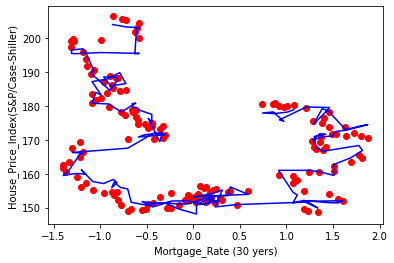

In [10]:
plt.scatter(X['Mortgage_Rate (30 yers)'], y, color = 'red')
plt.plot(X['Mortgage_Rate (30 yers)'], regressor.predict(X), color = 'blue')

plt.xlabel('Mortgage_Rate (30 yers)')
plt.ylabel('House_Price_Index(S&P/Case-Shiller)')
plt.show()

Mean Absolute Error: 2.11
Accuracy: 98.75 %.


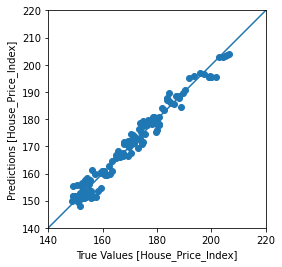

In [11]:
a = plt.axes(aspect='equal')
plt.scatter(y, y_pred)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

errors = abs(y_pred - y)


print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = np.mean(100 * (errors / y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [12]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [13]:
regressor.score(X, y, sample_weight=None) # Return the coefficient of determination r square of the prediction.

0.9727167817333383

In [14]:
coef=pd.DataFrame(regressor.coef_)
coef#get the coefficient for each term

,0
0,1.696050
1,12.731595
2,-6.889173
3,2.091678
4,5.368088
5,2.520184
6,-1.514733
7,-0.114163
8,1.598977
9,-3.571074


In [15]:
coef.to_csv('coef-result.csv',index = False, header=True)

In [16]:
print(y_pred)

[178.86274098 178.2081176  177.75048488 177.92020661 178.23013099
 175.45536037 175.89873309 179.69931669 179.5316589  177.73841076
 174.58647656 179.2348962  178.43294779 173.07293993 173.58428448
 174.11517668 174.4759606  172.88003457 172.47610604 171.15485311
 170.84527215 169.82912041 171.78648486 171.69209468 171.00819615
 167.72963217 166.65190044 168.34584938 166.89244511 164.72751643
 162.7626156  159.5175866  160.6606785  161.02170347 161.02192613
 154.60551094 153.7571893  151.41208286 152.13886027 151.49203898
 151.43655524 152.06911109 151.89374979 149.93477662 151.68154107
 150.93439607 150.24414834 155.21817761 154.0919854  153.11965935
 153.35430134 153.93843243 156.13932673 153.57288687 153.3964787
 152.28267128 151.50638329 150.85963205 152.52939379 153.61919277
 152.38058936 151.91527418 150.99446972 152.07275645 151.97519529
 150.83083974 150.24075225 151.82266108 151.51724821 151.08538589
 151.20978384 152.93573325 152.029133   148.15581466 149.65595227
 151.125351

In [17]:
Newy=pd.DataFrame(y_pred)
Newy.to_csv('y-pred.csv',index = False, header=True)
X.to_csv('X.csv',index = False, header=True)
Newy

,0
0,178.862741
1,178.208118
2,177.750485
3,177.920207
4,178.230131
...,...
143,203.014502
144,203.055492
145,203.282768
146,203.468725


In [18]:
X_transpose=X.transpose()

In [19]:
X_transpose

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
Mortgage_Rate (30 yers),1.078645,1.011570,0.877419,0.743268,0.858255,0.973241,0.925330,1.212796,1.461934,1.404440,...,-1.288159,-1.278577,-0.991111,-0.579076,-0.626987,-0.607822,-0.579076,-0.722809,-0.761138,-0.866542
Personal_Income,-1.371306,-1.371306,-1.371306,-1.371306,-1.371306,-1.371306,-1.371306,-1.371306,-1.371306,-1.371306,...,1.677779,1.677779,1.677779,1.677779,1.677779,2.212195,2.212195,2.212195,2.212195,2.212195
Resident_Population,-1.528500,-1.528500,-1.528500,-1.528500,-1.528500,-1.528500,-1.528500,-1.528500,-1.528500,-1.528500,...,1.480676,1.480676,1.480676,1.480676,1.480676,1.735982,1.735982,1.735982,1.735982,1.735982
Unemployment_Rate,-0.487240,-0.706202,-0.779190,-0.414253,-0.560228,-0.779190,-0.487240,-0.852177,-0.706202,-0.852177,...,-1.436077,-1.655039,-1.728026,-1.728026,-1.144127,-1.144127,-1.363089,-1.582051,-1.436077,-1.217114
GDP,-1.407249,-1.407249,-1.407249,-1.407249,-1.407249,-1.407249,-1.407249,-1.407249,-1.407249,-1.407249,...,1.583005,1.583005,1.583005,1.583005,1.583005,2.112954,2.112954,2.112954,2.112954,2.112954
Crime_Rate,1.742360,1.742360,1.742360,1.742360,1.742360,1.742360,1.742360,1.742360,1.742360,1.742360,...,-1.035144,-1.035144,-1.035144,-1.035144,-1.208972,-1.208972,-1.208972,-1.208972,-1.208972,-1.208972
Median_Debt,-3.429515,-3.228896,-3.028276,-2.827656,-2.713328,-2.599000,-2.484672,-2.177723,-1.870774,-1.563825,...,-0.339745,-0.282217,-0.224690,-0.167162,-0.082244,0.002674,0.087592,0.123224,0.158855,0.194487
New_Structures,1.432334,0.850015,1.759291,2.635156,1.797476,0.818990,0.890587,0.850015,0.847629,1.993173,...,2.320131,0.086319,0.375092,0.048134,-0.422016,-0.438722,1.861913,-0.386218,1.869073,0.702049
Economic_Conditions_Index,-0.728813,-0.557200,-0.499996,-0.557200,-0.133889,-0.208254,-0.036642,-0.082405,-0.202534,-0.322663,...,0.878627,0.867186,0.804261,0.689852,0.232218,0.203616,0.729895,1.136046,1.147487,0.981594
CPI all items less shelter,-2.195793,-2.112079,-2.112079,-2.098127,-2.098127,-1.512132,-1.512132,-1.791177,-1.791177,-1.672583,...,1.032903,1.025439,1.025439,1.277626,1.277626,1.307274,1.307274,1.335877,1.335877,1.266604


In [20]:
X_transpose=X_transpose.reset_index()

In [21]:
X_transpose

,index,0,1,2,3,4,5,6,7,8,...,138,139,140,141,142,143,144,145,146,147
0,Mortgage_Rate (30 yers),1.078645,1.011570,0.877419,0.743268,0.858255,0.973241,0.925330,1.212796,1.461934,...,-1.288159,-1.278577,-0.991111,-0.579076,-0.626987,-0.607822,-0.579076,-0.722809,-0.761138,-0.866542
1,Personal_Income,-1.371306,-1.371306,-1.371306,-1.371306,-1.371306,-1.371306,-1.371306,-1.371306,-1.371306,...,1.677779,1.677779,1.677779,1.677779,1.677779,2.212195,2.212195,2.212195,2.212195,2.212195
2,Resident_Population,-1.528500,-1.528500,-1.528500,-1.528500,-1.528500,-1.528500,-1.528500,-1.528500,-1.528500,...,1.480676,1.480676,1.480676,1.480676,1.480676,1.735982,1.735982,1.735982,1.735982,1.735982
3,Unemployment_Rate,-0.487240,-0.706202,-0.779190,-0.414253,-0.560228,-0.779190,-0.487240,-0.852177,-0.706202,...,-1.436077,-1.655039,-1.728026,-1.728026,-1.144127,-1.144127,-1.363089,-1.582051,-1.436077,-1.217114
4,GDP,-1.407249,-1.407249,-1.407249,-1.407249,-1.407249,-1.407249,-1.407249,-1.407249,-1.407249,...,1.583005,1.583005,1.583005,1.583005,1.583005,2.112954,2.112954,2.112954,2.112954,2.112954
5,Crime_Rate,1.742360,1.742360,1.742360,1.742360,1.742360,1.742360,1.742360,1.742360,1.742360,...,-1.035144,-1.035144,-1.035144,-1.035144,-1.208972,-1.208972,-1.208972,-1.208972,-1.208972,-1.208972
6,Median_Debt,-3.429515,-3.228896,-3.028276,-2.827656,-2.713328,-2.599000,-2.484672,-2.177723,-1.870774,...,-0.339745,-0.282217,-0.224690,-0.167162,-0.082244,0.002674,0.087592,0.123224,0.158855,0.194487
7,New_Structures,1.432334,0.850015,1.759291,2.635156,1.797476,0.818990,0.890587,0.850015,0.847629,...,2.320131,0.086319,0.375092,0.048134,-0.422016,-0.438722,1.861913,-0.386218,1.869073,0.702049
8,Economic_Conditions_Index,-0.728813,-0.557200,-0.499996,-0.557200,-0.133889,-0.208254,-0.036642,-0.082405,-0.202534,...,0.878627,0.867186,0.804261,0.689852,0.232218,0.203616,0.729895,1.136046,1.147487,0.981594
9,CPI all items less shelter,-2.195793,-2.112079,-2.112079,-2.098127,-2.098127,-1.512132,-1.512132,-1.791177,-1.791177,...,1.032903,1.025439,1.025439,1.277626,1.277626,1.307274,1.307274,1.335877,1.335877,1.266604


In [22]:
X_transpose_index=X_transpose[['index']]

In [23]:
X_transpose_index

,index
0,Mortgage_Rate (30 yers)
1,Personal_Income
2,Resident_Population
3,Unemployment_Rate
4,GDP
5,Crime_Rate
6,Median_Debt
7,New_Structures
8,Economic_Conditions_Index
9,CPI all items less shelter


In [24]:
X_transpose_index=X_transpose_index.join(coef)

In [25]:
X_transpose_index

,index,0
0,Mortgage_Rate (30 yers),1.696050
1,Personal_Income,12.731595
2,Resident_Population,-6.889173
3,Unemployment_Rate,2.091678
4,GDP,5.368088
5,Crime_Rate,2.520184
6,Median_Debt,-1.514733
7,New_Structures,-0.114163
8,Economic_Conditions_Index,1.598977
9,CPI all items less shelter,-3.571074


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

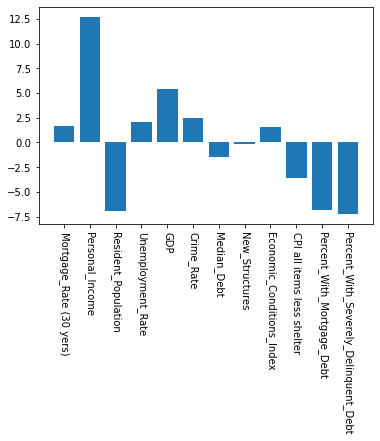

In [26]:
plt.bar(X_transpose_index['index'],X_transpose_index[0])
plt.xticks(rotation=270)

In [27]:
raw_dataset_2 = pd.read_csv('2018 prediction.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features_2 = raw_dataset_2.copy()

features_2.head(14)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
0,7/1/2017,201.825606,3.97,78923,4873.019,3.7,464426.027,669.2019,36.00%,241480.0000,1.27%,1875,2.95,247.032
1,8/1/2017,202.915818,3.88,78923,4873.019,3.5,464426.027,669.2019,36.00%,241737.0000,1.23%,1032,2.60,250.226
2,9/1/2017,204.398359,3.81,78923,4873.019,3.3,464426.027,669.2019,36.00%,241994.0000,1.20%,1245,2.50,250.226
3,10/1/2017,205.184641,3.90,78923,4873.019,3.0,464426.027,669.2019,36.00%,242478.3333,1.17%,1227,3.15,250.374
4,11/1/2017,205.661339,3.92,78923,4873.019,2.9,464426.027,669.2019,36.00%,242962.6667,1.13%,989,2.47,250.374
5,12/1/2017,206.398537,3.95,78923,4873.019,2.9,464426.027,669.2019,36.00%,243447.0000,1.10%,2129,2.42,252.932
6,2018/1/1,207.867448,4.03,78923,4873.019,3.6,464426.027,622.4511,36.60%,242691.0000,1.10%,1410,2.53,252.932
7,2018/2/1,210.636170,4.33,81498,4873.019,3.5,484620.546,622.4511,36.60%,242691.0000,1.10%,714,2.05,254.992
8,2018/3/1,210.815006,4.44,81498,4873.019,3.3,484620.546,622.4511,36.60%,242691.0000,1.10%,1174,2.40,254.992
9,2018/4/1,212.130453,4.47,81498,4873.019,2.9,484620.546,622.4511,35.50%,241783.0000,1.00%,606,1.76,253.770


In [28]:
mort_debt_2 = np.array(features_2['Percent_With_Mortgage_Debt'])
mdebt_2 = []
for x in mort_debt_2:
  mdebt_2.append(float(x[:5]))
features_2 = features_2.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt_2 = np.array(features_2['Percent_With_Severely_Delinquent_Debt'])
ddebt_2 = []
for x in del_debt_2:
  ddebt_2.append(float(x[:4]))
features_2 = features_2.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features_2['Percent_With_Mortgage_Debt'] = mdebt_2
features_2['Percent_With_Severely_Delinquent_Debt'] = ddebt_2
features_2.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,7/1/2017,201.825606,3.97,78923,4873.019,3.7,464426.027,669.2019,241480.0000,1875,2.95,247.032,36.0,1.27
1,8/1/2017,202.915818,3.88,78923,4873.019,3.5,464426.027,669.2019,241737.0000,1032,2.60,250.226,36.0,1.23
2,9/1/2017,204.398359,3.81,78923,4873.019,3.3,464426.027,669.2019,241994.0000,1245,2.50,250.226,36.0,1.20
3,10/1/2017,205.184641,3.90,78923,4873.019,3.0,464426.027,669.2019,242478.3333,1227,3.15,250.374,36.0,1.17
4,11/1/2017,205.661339,3.92,78923,4873.019,2.9,464426.027,669.2019,242962.6667,989,2.47,250.374,36.0,1.13


In [29]:
y_2= features_2.pop("House_Price_Index(S&P/Case-Shiller)")
X_2=features_2.drop('Date',axis=1)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3.97,78923,4873.019,3.7,464426.027,669.2019,241480.0000,1875,2.95,247.032,36.0,1.27
1,3.88,78923,4873.019,3.5,464426.027,669.2019,241737.0000,1032,2.60,250.226,36.0,1.23
2,3.81,78923,4873.019,3.3,464426.027,669.2019,241994.0000,1245,2.50,250.226,36.0,1.20
3,3.90,78923,4873.019,3.0,464426.027,669.2019,242478.3333,1227,3.15,250.374,36.0,1.17
4,3.92,78923,4873.019,2.9,464426.027,669.2019,242962.6667,989,2.47,250.374,36.0,1.13
5,3.95,78923,4873.019,2.9,464426.027,669.2019,243447.0000,2129,2.42,252.932,36.0,1.10
6,4.03,78923,4873.019,3.6,464426.027,622.4511,242691.0000,1410,2.53,252.932,36.6,1.10
7,4.33,81498,4873.019,3.5,484620.546,622.4511,242691.0000,714,2.05,254.992,36.6,1.10
8,4.44,81498,4873.019,3.3,484620.546,622.4511,242691.0000,1174,2.40,254.992,36.6,1.10
9,4.47,81498,4873.019,2.9,484620.546,622.4511,241783.0000,606,1.76,253.770,35.5,1.00


In [30]:
train_stats_2 = X_2.describe()
train_stats_2 = train_stats_2.transpose()
train_stats_2

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),12.0,4.155000,0.298374,3.8100,3.9150,4.00000,4.4475,4.5900
Personal_Income,12.0,79995.916667,1325.941275,78923.0000,78923.0000,78923.00000,81498.0000,81498.0000
Resident_Population,12.0,4873.019000,0.000000,4873.0190,4873.0190,4873.01900,4873.0190,4873.0190
Unemployment_Rate,12.0,3.250000,0.296954,2.9000,2.9750,3.30000,3.5000,3.7000
GDP,12.0,472840.409917,10398.736417,464426.0270,464426.0270,464426.02700,484620.5460,484620.5460
Crime_Rate,12.0,645.826500,24.414809,622.4511,622.4511,645.82650,669.2019,669.2019
Median_Debt,12.0,242293.416667,612.708876,241480.0000,241783.0000,242236.16665,242691.0000,243447.0000
New_Structures,12.0,1333.833333,501.775907,606.0000,1021.2500,1236.00000,1566.0000,2142.0000
Economic_Conditions_Index,12.0,2.296667,0.583879,1.0000,1.9775,2.44500,2.5475,3.1500
CPI all items less shelter,12.0,252.122833,2.438822,247.0320,250.3370,252.93200,253.7910,254.9920


In [31]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X_2 = norm(X_2)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,-0.799467,2.212195,1.735982,-1.217114,2.112954,-1.208972,0.256782,2.377408,0.947272,1.266604,-2.149366,-0.980802
1,-0.885706,2.212195,1.735982,-1.363089,2.112954,-1.208972,0.319076,0.365545,0.747057,1.489421,-2.149366,-1.013580
2,-0.952782,2.212195,1.735982,-1.509064,2.112954,-1.208972,0.381371,0.873881,0.689852,1.489421,-2.149366,-1.038164
3,-0.866542,2.212195,1.735982,-1.728026,2.112954,-1.208972,0.498769,0.830923,1.061680,1.499746,-2.149366,-1.062748
4,-0.847378,2.212195,1.735982,-1.801014,2.112954,-1.208972,0.616168,0.262924,0.672691,1.499746,-2.149366,-1.095526
5,-0.818631,2.212195,1.735982,-1.801014,2.112954,-1.208972,0.733567,2.983592,0.644089,1.678196,-2.149366,-1.120110
6,-0.741973,2.212195,1.735982,-1.290102,2.112954,-1.421743,0.550318,1.267662,0.707014,1.678196,-1.815688,-1.120110
7,-0.454507,2.564055,1.735982,-1.363089,2.514820,-1.421743,0.550318,-0.393378,0.432433,1.821904,-1.815688,-1.120110
8,-0.349103,2.564055,1.735982,-1.509064,2.514820,-1.421743,0.550318,0.704436,0.632648,1.821904,-1.815688,-1.120110
9,-0.320356,2.564055,1.735982,-1.801014,2.514820,-1.421743,0.330226,-0.651125,0.266541,1.736656,-2.427430,-1.202056


In [32]:
y_pred_2 = regressor.predict(X_2)


In [33]:
print(y_pred_2)

[207.733206   206.53987194 206.05600203 206.30810842 205.69176148
 204.74818585 203.70926079 209.91852733 209.9867751  214.40067471
 213.63471163 215.04466271]


In [34]:
Newy_2=pd.DataFrame(y_pred_2)
Newy_2.to_csv('y-verify.csv',index = False, header=True)
Newy_2

,0
0,207.733206
1,206.539872
2,206.056002
3,206.308108
4,205.691761
5,204.748186
6,203.709261
7,209.918527
8,209.986775
9,214.400675
